# Activity 7: Feature Extraction

Submitted by Mary Franczine Tan | Student No. 2020-10177

Applied Physics 157, AY 2022-2023 2nd Semester

Submitted on June 21, 2023


In [2]:
# import libraries
 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import pandas as pd
from skimage.measure import regionprops, label, regionprops_table
from matplotlib.colors import ListedColormap
import glob

## Feature Extraction

### Segment Images

Here, we use Otsu's method to perform automatic segmentation on the images. We choose to use this method because it will give the best results in the segmentation, as well as the ease of use as it is already a function in opencv. After segmentation, we will also conduct morphological operations as needed to clean the image.

In [3]:
img = mpimg.imread('IMG_4860.JPG')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

blur = cv2.GaussianBlur(gray, (5, 5), 0)
ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [4]:
kernel = np.ones((15,15), np.uint8)
step1 = cv2.morphologyEx(th3, cv2.MORPH_CLOSE, kernel)
step2 = cv2.erode(step1, kernel)
segmented = cv2.dilate(step2, kernel)

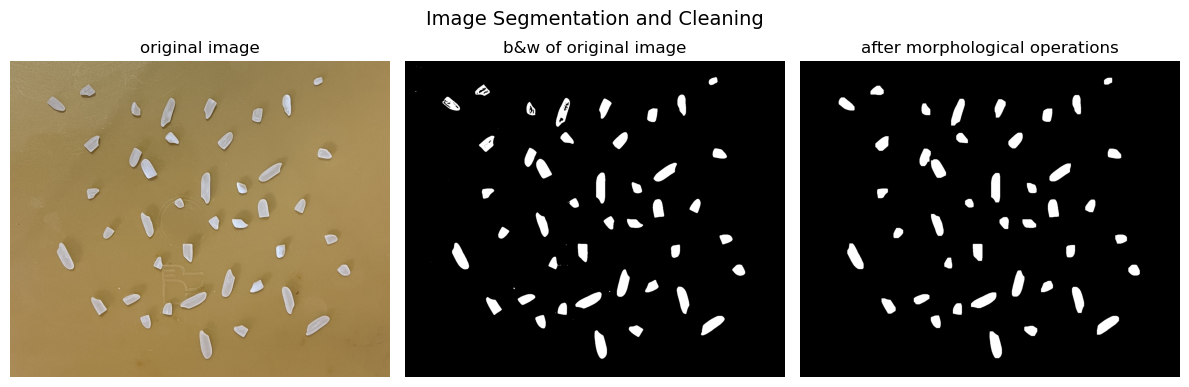

In [5]:
fig, ax = plt.subplots(1, 3, figsize = (12, 4))

ax[0].imshow(img)
ax[0].set_title('original image')
ax[1].imshow(th3, cmap = 'gray')
ax[1].set_title('b&w of original image')
ax[2].imshow(segmented, cmap = 'gray')
ax[2].set_title('after morphological operations')

for i in range(3):
    ax[i].axis('off')
    
plt.suptitle('Image Segmentation and Cleaning', size = 14)
plt.tight_layout()
plt.savefig('reportpics/preprocessing.png')

### Extract Features

We also make use of the python library scikit tool images to label the blobs and extract their features, because there are no built in functions to do so like in matlab. 

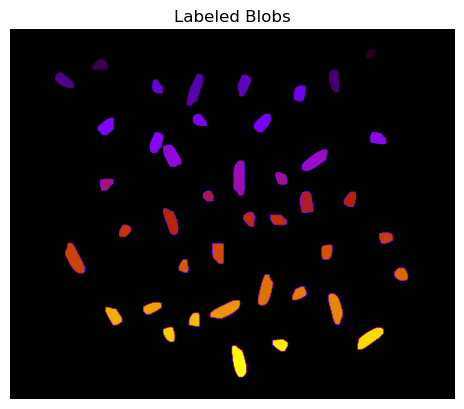

In [6]:
labeled = label(segmented)

plt.imshow(labeled, cmap = 'gnuplot')
plt.axis('off')
plt.title('Labeled Blobs')
plt.savefig('reportpics/labeled.png')

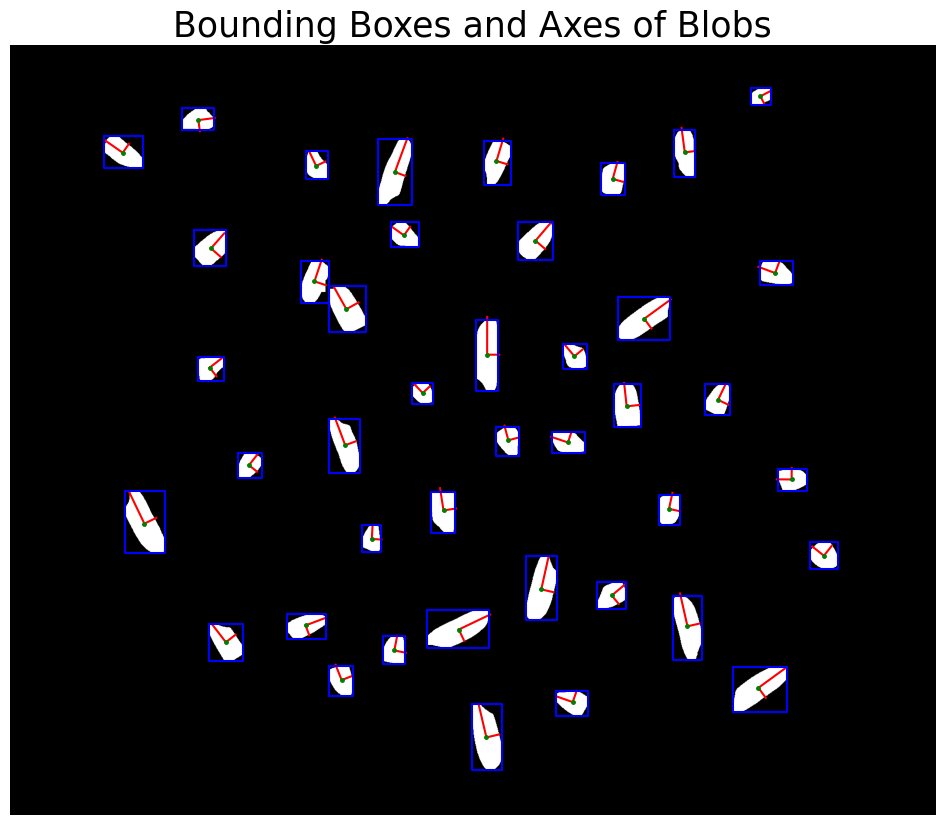

In [7]:
fig, ax = plt.subplots(figsize = (12, 10))
ax.imshow(segmented, cmap=plt.cm.gray)

regions = regionprops(labeled)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + np.cos(orientation) * 0.5 * props.axis_minor_length
    y1 = y0 - np.sin(orientation) * 0.5 * props.axis_minor_length
    x2 = x0 - np.sin(orientation) * 0.5 * props.axis_major_length
    y2 = y0 - np.cos(orientation) * 0.5 * props.axis_major_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=1.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=1.5)
    ax.plot(x0, y0, '.g', markersize=5)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=1.5)

ax.set_title('Bounding Boxes and Axes of Blobs', size = 25)
ax.axis('off')
plt.show()
fig.savefig('reportpics/boxedblobs.png')

We can see in the images above that we have successfully labeled all of the grains of rice in the image. Using skimage, we've also determined each blob's properties like bounding box, centroid, eccentricity and area. With these data, we are able to label and visualize each feature on the image itself.

In [8]:
props = regionprops_table(labeled, properties = ('label', 'centroid', 'eccentricity', 'area',
                                                 'orientation', 'solidity'))

props_df = pd.DataFrame(props)
display(props_df.head())

,label,centroid-0,centroid-1,eccentricity,area,orientation,solidity
0,1,94.859667,1394.059252,0.732934,962,-1.089350,0.982635
1,2,139.023462,349.640772,0.730414,1918,-1.444515,0.973604
2,3,199.091611,1253.539367,0.910660,2718,0.131311,0.971061
3,4,199.736075,209.022056,0.873850,2675,0.962313,0.979853
4,5,235.598105,714.839150,0.950833,4327,-0.352288,0.969310


### Sources:
- Otsu's Method from OpenCV documentation [page](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html)
- RegionProps from scikit-image documentation [page](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_regionprops.html)

## Bonus: Tracking Change of Vegetation Area Over Time

In [9]:
## import images

filenames = sorted(glob.glob('bonuspics/*.png'))
files = [plt.imread(file) for file in filenames]
mask = plt.imread('border.png')
#mask = cv2.cvtColor(plt.imread('border.png'), cv2.COLOR_RGB2GRAY)

The goal here is to quantitatively track the changes in vegetation area within the border of Philippine Science High School - Cagayan Valley School. Since the current images show even the surrounding areas, I made a mask of the school's border using Figma. The masked vegetation area is show in the figure below.

In [10]:
def maskpics(img):
    masked = cv2.bitwise_and(img, mask)
    return cv2.cvtColor(masked, cv2.COLOR_RGB2GRAY)
    

cvc10 = maskpics(files[0])
cvc14 = maskpics(files[1])
cvc16 = maskpics(files[2])
cvc18 = maskpics(files[3])
cvc20 = maskpics(files[4])
cvc21 = maskpics(files[5])

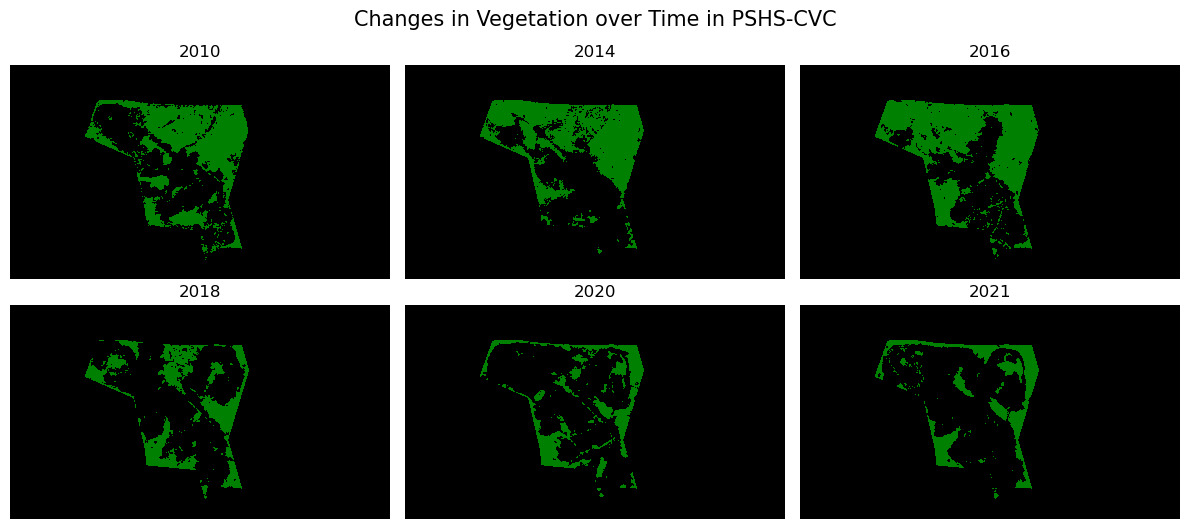

In [11]:
# plot vegetation over the years
cmap = ListedColormap(['black', 'green'])

fig, ax = plt.subplots(2, 3, figsize = (12, 5.5))

ax[0][0].imshow(cvc10, cmap = cmap)
ax[0][0].set_title('2010')
ax[0][0].axis('off')
ax[0][1].imshow(cvc14, cmap = cmap)
ax[0][1].set_title('2014')
ax[0][1].axis('off')
ax[0][2].imshow(cvc16, cmap = cmap)
ax[0][2].set_title('2016')
ax[0][2].axis('off')
ax[1][0].imshow(cvc18, cmap = cmap)
ax[1][0].set_title('2018')
ax[1][0].axis('off')
ax[1][1].imshow(cvc20, cmap = cmap)
ax[1][1].set_title('2020')
ax[1][1].axis('off')
ax[1][2].imshow(cvc21, cmap = cmap)
ax[1][2].set_title('2021')
ax[1][2].axis('off')

plt.suptitle('Changes in Vegetation over Time in PSHS-CVC', size = 15)
plt.tight_layout()
plt.savefig('reportpics/vegetation.png')

Since our images are made of binary values, with 1 being the areas of vegetation, an easy way to approximate the total vegetation cover is to count the number of pixels with value 1.

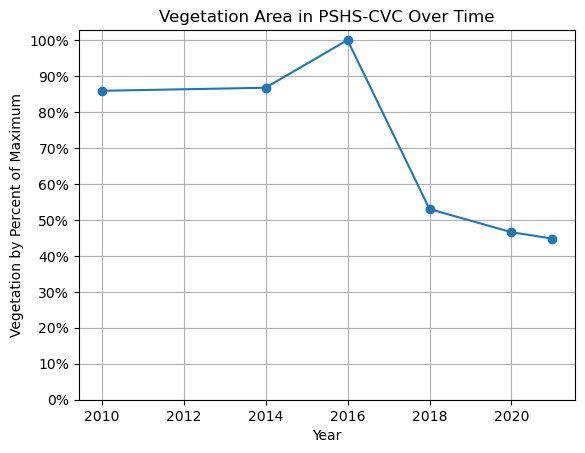

In [12]:
year = [2010, 2014, 2016, 2018, 2020, 2021]
area = [cvc10.sum(), cvc14.sum(), cvc16.sum(), cvc18.sum(), cvc20.sum(), cvc21.sum()]
percent = area / max(area)

plt.plot(year, percent, marker = 'o')
plt.ylabel('Vegetation by Percent of Maximum')
plt.xlabel('Year')
plt.grid()
plt.yticks(np.linspace(0,1,11), ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])

plt.title('Vegetation Area in PSHS-CVC Over Time')
plt.savefig('reportpics/vegetationtimeseries')

We can see in the graph that 2010 to 2016 saw a slight increase in vegetation, but 2016 to 2021 saw more than 50% decrease in vegetation area.